In [130]:
import h5py
import numpy as np
import rioxarray as rx
from sys import stdout
import os
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt
%matplotlib inline


In [168]:
%%time
xr = rx.open_rasterio('pr_2020.nc')
xr.attrs['units'] = 'mm'

xr

CPU times: user 20.5 ms, sys: 5.85 ms, total: 26.4 ms
Wall time: 24.6 ms


<xarray.DataArray 'precipitation_amount' (day: 366, y: 585, x: 1386)>
[296756460 values with dtype=uint16]
Coordinates:
  * day      (day) object 2020-01-01 00:00:00 ... 2020-12-31 00:00:00
  * x        (x) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * y        (y) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
    crs      int64 0
Attributes:
    add_offset:         0.0
    coordinates:        lon lat
    coordinate_system:  WGS84,EPSG:4326
    description:        Daily Accumulated Precipitation
    dimensions:         lon lat time
    long_name:          pr
    missing_value:      32767
    scale_factor:       0.1
    standard_name:      pr
    units:              mm
    _FillValue:         32767.0
    _Unsigned:          true

In [169]:
print(xr.dims)
print(xr.attrs)
print(xr.coords)

('day', 'y', 'x')
{'add_offset': 0.0, 'coordinates': 'lon lat', 'coordinate_system': 'WGS84,EPSG:4326', 'description': 'Daily Accumulated Precipitation', 'dimensions': 'lon lat time', 'long_name': 'pr', 'missing_value': 32767, 'scale_factor': 0.1, 'standard_name': 'pr', 'units': 'mm', '_FillValue': 32767.0, '_Unsigned': 'true'}
Coordinates:
  * day      (day) object 2020-01-01 00:00:00 ... 2020-12-31 00:00:00
  * x        (x) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * y        (y) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
    crs      int64 0


In [162]:
xr[:, 100:105, 100:105]
xr

<xarray.DataArray 'precipitation_amount' (day: 366, y: 585, x: 1386)>
[296756460 values with dtype=uint16]
Coordinates:
  * day      (day) object 2020-01-01 00:00:00 ... 2020-12-31 00:00:00
  * x        (x) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * y        (y) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
    crs      int64 0
Attributes:
    add_offset:         0.0
    coordinates:        lon lat
    coordinate_system:  WGS84,EPSG:4326
    description:        Daily Accumulated Precipitation
    dimensions:         lon lat time
    long_name:          pr
    missing_value:      32767
    scale_factor:       0.1
    standard_name:      pr
    units:              mm
    _FillValue:         32767.0
    _Unsigned:          true

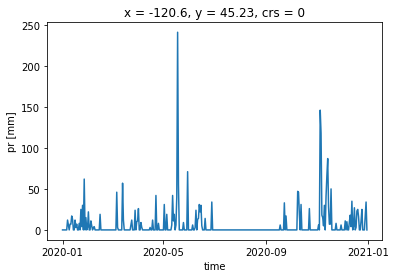

In [163]:
xr[:, 100, 100].plot()

In [166]:
type(xr)

xarray.core.dataarray.DataArray

In [152]:
xr_masked = xr.where(xr != xr.attrs['missing_value'])
xr_masked.shape
# xr_masked[112, :, :].plot()

(366, 585, 1386)

In [148]:
xr_masked

<xarray.DataArray 'precipitation_amount' (day: 366, y: 585, x: 1386)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * day      (day) object 2020-01-01 00:00:00 ... 2020-12-31 00:00:00
  * x        (x) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * y        (y) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
    crs      int64 0
Attributes:
    add_offset:         0.0
    coordinates:        lon lat
    coordinate_system:  WGS84,EPSG:4326
    description:        Daily Accumulated Precipitation
    dimensions:         lon lat time
    long_name:          pr
    missing_value:      32767
    scale_factor:       0.1
    standard_name:      pr
    units:              mm
    _FillValue:         32767.0
    _Unsigned:          true

In [106]:
%%time
xr_masked.mean()

<xarray.DataArray 'precipitation_amount' ()>
array(22.14306263)
Coordinates:
    crs      int64 0

CPU times: user 1.17 s, sys: 1.71 s, total: 2.87 s
Wall time: 3.32 s


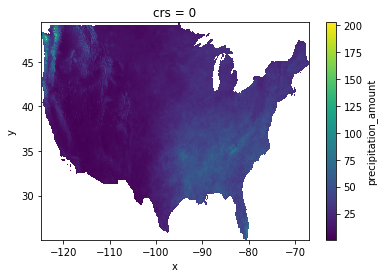

In [170]:
%%time
xr_masked.mean(dim='day').plot()